In [2]:
import tensorflow as tf 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import pandas as pd

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
!pip install opencv-python
import cv2

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

# Any results you write to the current directory are saved as output.

/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train/PNEUMONIA/pneumocystis-pneumonia-2-PA.png
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train/PNEUMONIA/41591_2020_819_Fig1_HTML.webp-day10.png
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train/PNEUMONIA/MERS-CoV-1-s2.0-S0378603X1500248X-gr4e.jpg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train/PNEUMONIA/8FDE8DBA-CFBD-4B4C-B1A4-6F36A93B7E87.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train/PNEUMONIA/ryct.2020200028.fig1a.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train/PNEUMONIA/auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train/PNEUMONIA/171CB377-62FF-4B76-906C-F3787A01CB2E.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train/PNEUMONIA

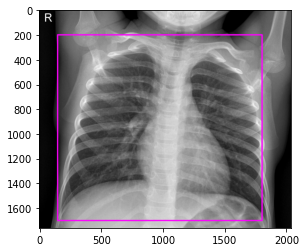

In [8]:
# # MANUAL CROPPING FEATURE FOR IMAGE ANNOTATION AND DATA AUGMENTATION 

# # RUNS ONLY IN LOCAL FOLDERS (CANNOT imwrite ON CLOUD SERVICE)
# # YOU CAN EXPERIMENT BUT IT CANT SAVE THE EXTRA AUGMENTED DATA IMAGES
# # UNCOMMENT ONCE FOR USING

# # path  
# path = r'/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train/NORMAL/IM-0063-0001.jpeg'
   
# # Reading an image in default mode 
# image = cv2.imread(path) 

# plt.imshow(image)
   
# # Window name in which image is displayed 
# window_name = 'Image'
  
# # Start coordinate, here (5, 5) 
# # represents the top left corner of rectangle 
# start_point = (150, 200) 
  
# # Ending coordinate, here (220, 220) 
# # represents the bottom right corner of rectangle 
# end_point = (1800, 1700) 
  
# # Blue color in RGB 
# color = (255, 0, 255) 
  
# # Line thickness of 2 px 
# thickness = 10
  
# # Using cv2.rectangle() method 
# # Draw a rectangle with blue line borders of thickness of 2 px 
# image1 = cv2.rectangle(image, start_point, end_point, color, thickness) 
  
# # Displaying the image  
# plt.imshow(image1)

In [ ]:
# # RUNS ONLY LOCALLY
# cropped = image[150:1800, 200:1800]
# plt.imshow(cropped)

In [ ]:
# # RUNS ONLY LOCALLY
# # IMPORTANT mod path : ./xray_dataset_covid19/train or test/NORMAL or PNEUMONIA 
# thepath = r'/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train/NORMAL'
# #os.listdir(thepath)
# os.chdir(thepath) 
# cv2.imwrite('extra_photo_1.png', cropped)

In [ ]:
train_dir_path = '/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19'
test_dir_path =  '/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19'

train_dir = os.path.join(train_dir_path, 'train')
test_dir = os.path.join(test_dir_path, 'test')

train_normal_dir = os.path.join(train_dir, 'NORMAL')  
train_pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')  
test_normal_dir = os.path.join(test_dir, 'NORMAL')  
test_pneumonia_dir = os.path.join(test_dir, 'PNEUMONIA')  

In [ ]:
num_normal_tr = len(os.listdir(train_normal_dir))
num_pneumonia_tr = len(os.listdir(train_pneumonia_dir))

num_normal_test = len(os.listdir(test_normal_dir))
num_pneumonia_test = len(os.listdir(test_pneumonia_dir))

total_train = num_normal_tr + num_pneumonia_tr
total_val = num_normal_test + num_pneumonia_test


print('total training normal images:', num_normal_tr)
print('total training pneumonia images:', num_pneumonia_tr)

print('total validation normal images:', num_normal_test)
print('total validation pneumonia images:', num_pneumonia_test)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

In [ ]:
os.listdir(train_normal_dir) #used only for inspecting folder

In [ ]:
#batch_size = 36
batch_size_train = 74
batch_size_test = 20 # dokimase 40 
epochs = 15
IMG_HEIGHT = 256 #na ta kanw pio megala gt ta tis tentwnei 
IMG_WIDTH = 256 

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255, zoom_range= 0.2, rotation_range= 10) # Generator for our training data
test_image_generator = ImageDataGenerator(rescale=1./255, zoom_range= 0.2, rotation_range= 10) # Generator for our validation data

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size_train,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary',
                                                           #color_mode = 'grayscale'
                                                          )
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size_test,
                                                              directory=test_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary',
                                                              #color_mode = 'grayscale'
                                                        )

In [ ]:
sample_training_images, _ = next(train_data_gen)

In [ ]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
plotImages(sample_training_images[:10])

In [ ]:
#                                                             ** Model Build **

In [ ]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.1),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    #Dropout(0.1),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
    #, activation= 'sigmoid')
    #activation='hard_sigmod' 
    #padding= 'valid'
])

In [ ]:
model.compile(#optimizer='sgd',
              optimizer= 'adam', 
              # o 'adam' ftanei pio grhgora se megala accuracy apo ton 'sgd'
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
#                                                              ** Training **

In [ ]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size_train,
    epochs=epochs,
    validation_data=test_data_gen,
    validation_steps=total_val // batch_size_test,
    #callbacks=[metrics]
)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Printing augmented images

In [ ]:
# zoom_range from 0 - 1 where 1 = 100%.
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.2) # up to 20%

In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH),
                                               )

augmented_images = [train_data_gen[0][0][0] for i in range(10)]

In [ ]:
plotImages(augmented_images)